In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# ETMT Data Analysis

## Stress-Strain

Load in the columns from the datafile. 

Note, start from zero.

These are:

    H(7) Position/Displacement in mm
    I(8) Load in N
    J(9) Measured Current in Amps
    K(10) T/C Temperature in C
    L(11) Measured Voltage in V
    N(13) Frame Waveform

To become: 

    0= Position/Displacement in mm
    1= Load in N
    2= Measured Current in Amps
    3= T/C Temperature in C
    4= Measured Voltage in V
    6= Frame Waveform

In [2]:
use_columns = [7,8,9,10,11,13]

position = 0
load = 1
current = 2
temperature = 3
voltage = 4
frame = 5

In [3]:
ETMT_DataArray = np.loadtxt('035_2Nb_TDload_800C_15mms/Test1/Test1.steps.tracking.csv', skiprows=1, delimiter=',', usecols=(7,8,9,10,11,13))
print(ETMT_DataArray)

[[  4.73999884e-02   9.48971137e-02   2.61545181e-02   2.67292061e+01
    5.62073663e-04   0.00000000e+00]
 [  4.73999884e-02   7.27549195e-02   2.67602503e-02   2.66317581e+01
    5.59873879e-04   0.00000000e+00]
 [  4.73999884e-02   1.01281330e-01   2.24828720e-02   2.65326798e+01
    5.61634079e-04   0.00000000e+00]
 ..., 
 [  3.07266023e+00   8.63242894e-01   2.53766775e-02   3.95957949e+01
    5.51293604e-04   0.00000000e+00]
 [  3.07265995e+00   8.92300159e-01   2.64752656e-02   3.95619669e+01
    5.46570867e-04   0.00000000e+00]
 [  3.07265995e+00   9.15406272e-01   2.44554132e-02   3.94980507e+01
    5.51249832e-04   0.00000000e+00]]


Find the start and end of the loading test using FrameWaveform signal (when not equal to zero)

In [5]:
FrameWaveform = ETMT_DataArray[:,frame]
np.nonzero(FrameWaveform)

(array([13952, 13953, 13954, ..., 15106, 15107, 15108]),)

Set start and end of loading row value!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [940]:
# Set start and end of loading row value.
start=6984
end=22143

Plot Stress (MPa) versus Position (mm)

First, calculate the stress from the load

In [941]:
stress = ETMT_DataArray [start:end, load] / 4

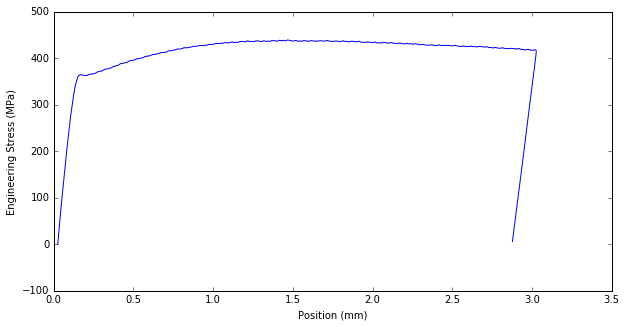

In [942]:
plt.figure(figsize=(10,5)) # decides the size of your plot in cm, useful for reports
x = ETMT_DataArray[start:end,position]
# y = ETMT_DataArray[start:end,load]
y = stress
plt.plot(x,y) # plt=plot(x,y)

plt.xlabel('Position (mm)')
plt.ylabel('Engineering Stress (MPa)')
plt.show() # shows the plot you have asked
# plt.savefig("filename.eps or .png")

Then plot Trues Stress (MPa) versus True Strain. To do this use resistance method to calculate true strain $\varepsilon_p = \ln{ \sqrt{ \frac{R_l}{R_s}}}$ where the resistance during the test, $R_l$ and at the start $R_s$ is calculated from the Measured Voltage and Measured Current $R=\frac{V}{I}$. But, we need to find the start of the test using the Frame Waveform, when it is not 0.

In [943]:
StartCurrent = ETMT_DataArray[start,current]
StartVoltage = ETMT_DataArray[start,volt]
CurrentArray = ETMT_DataArray[start:end,current]
VoltageArray = ETMT_DataArray[start:end,volt]

StartResistance = StartVoltage / StartCurrent
ResistanceArray = VoltageArray / CurrentArray

TrueStrain = np.log(np.sqrt(ResistanceArray/StartResistance))

EngineeringStrain = np.expm1(TrueStrain)

TrueStress = stress*(1 + EngineeringStrain)

First, plot Resistance versus Position to check.

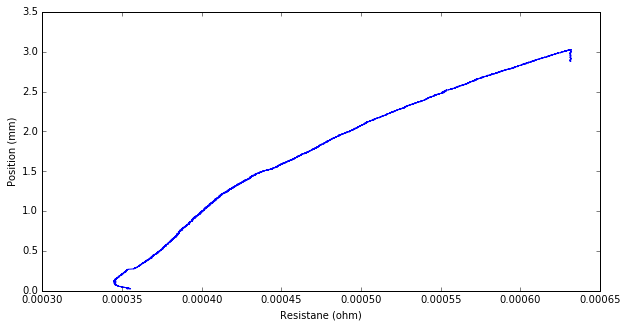

In [944]:
plt.figure(figsize=(10,5)) # decides the size of your plot in cm, useful for reports
x = ResistanceArray
y = ETMT_DataArray[start:end,position]
plt.plot(x,y) # plt=plot(x,y)

plt.xlabel('Resistane (ohm)')
plt.ylabel('Position (mm)')

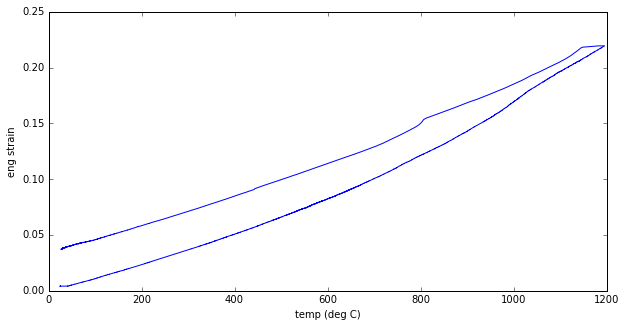

In [23]:
pos = ETMT_DataArray[:,position]
strain = pos / 2

plt.figure(figsize=(10,5)) # decides the size of your plot in cm, useful for reports
x = ETMT_DataArray[:,temp]
y = strain
plt.plot(x,y) # plt=plot(x,y)

plt.xlabel('temp (deg C)')
plt.ylabel('eng strain')

Then, plot Engineering Stress versus True Strain

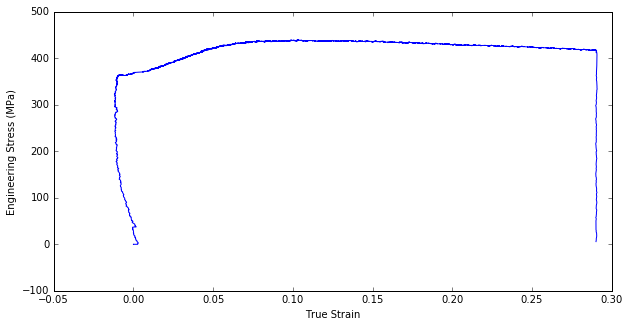

In [945]:
plt.figure(figsize=(10,5)) # decides the size of your plot in cm, useful for reports
x = TrueStrain
# y = ETMT_DataArray[start:end,load]
y = stress
plt.plot(x,y) # plt=plot(x,y)

plt.xlabel('True Strain')
plt.ylabel('Engineering Stress (MPa)')

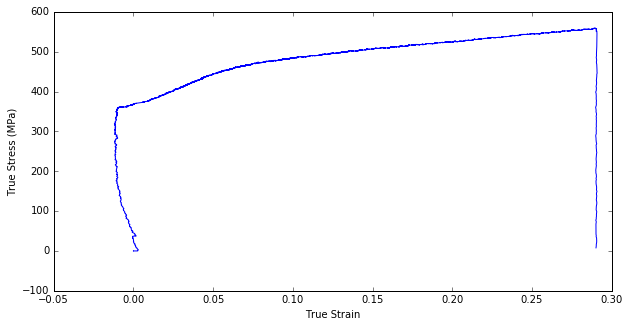

In [946]:
plt.figure(figsize=(10,5)) # decides the size of your plot in cm, useful for reports
x = TrueStrain
# y = ETMT_DataArray[start:end,load]
y = TrueStress
plt.plot(x,y) # plt=plot(x,y)

plt.xlabel('True Strain')
plt.ylabel('True Stress (MPa)')

Check the temperature variation during loading...

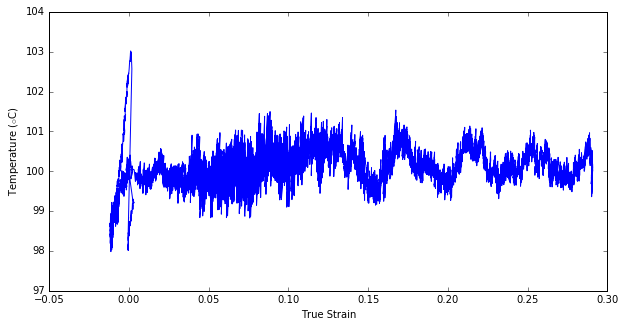

In [947]:
plt.figure(figsize=(10,5)) # decides the size of your plot in cm, useful for reports
x = TrueStrain
y = ETMT_DataArray[start:end,temp]
plt.plot(x,y) # plt=plot(x,y)

plt.xlabel('True Strain')
plt.ylabel('Temperature ($\circ$C)')

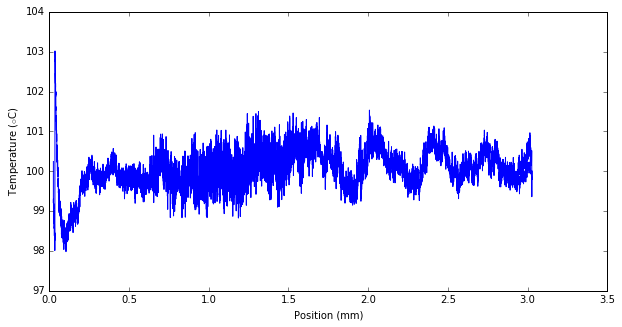

In [948]:
plt.figure(figsize=(10,5)) # decides the size of your plot in cm, useful for reports
x = ETMT_DataArray[start:end,position]
y = ETMT_DataArray[start:end,temp]
plt.plot(x,y) # plt=plot(x,y)

plt.xlabel('Position (mm)')
plt.ylabel('Temperature ($\circ$C)')

Output datafile for comaprison to SXRD data:

        0= Load (N)
        1= Position/Displacement in mm
        2= Engineering Stress in MPa
        3= True Strain
        4= True Stress (MPa)
        5= Temperature (C)
        

In [949]:
np.savetxt('096.txt', np.c_[ETMT_DataArray[start:end,position], ETMT_DataArray[start:end,position], stress, TrueStrain, TrueStress, ETMT_DataArray[start:end,temp]], header = 'Load (N), Position (mm), Engineering Stress (MPa), True Strain, True Stress (MPa), Temperature (C)', delimiter = ',')

## Beta-Transus

Plot Resistivity versus Temperature....

First, search for row with maximum temperature (~1000C) and when it is ~100C

In [138]:
minimum=100
maximum=1000

In [139]:
plt.figure(figsize=(10,5)) # decides the size of your plot in cm, useful for reports
x = ETMT_DataArray[minimum:maximum,temp]
y = ETMT_DataArray[minimum:maximum,resistivity]
plt.plot(x,y) # plt=plot(x,y)

plt.xlabel('Temperature ($\circ$C)')
plt.ylabel('Resistivity')

NameError: name 'resistivity' is not defined